In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

city_counts = pd.read_excel('city_counts.xlsx')

In [2]:
# convert the count column to float
city_counts['count'] = city_counts['count'].astype(float)

In [3]:
# read the boundaries/world-administrative-boundaries.shp as a GeoDataFrame
world = gpd.read_file('boundaries/world-administrative-boundaries.shp')
world: gpd.GeoDataFrame


Normalization range: 1.0986122886681098 to 5.723585101952381


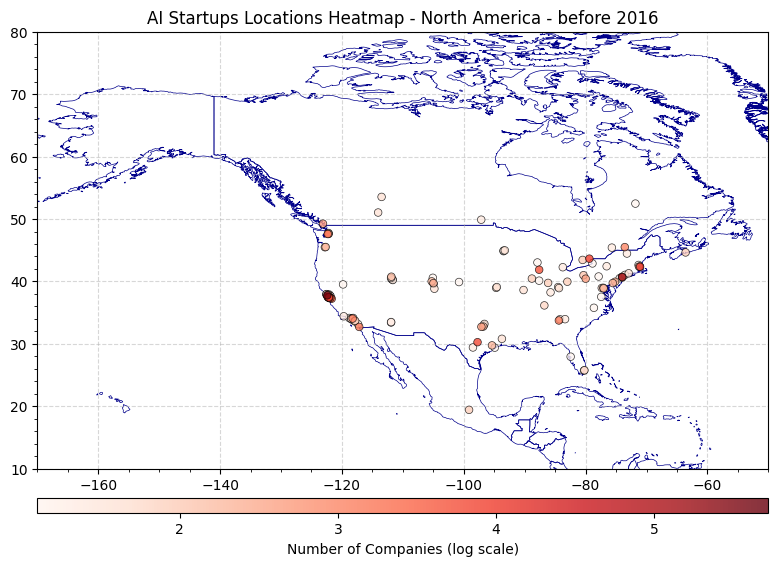

In [5]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

# read the boundaries/world-administrative-boundaries.shp as a GeoDataFrame
world = gpd.read_file('boundaries/world-administrative-boundaries.shp')
world: gpd.GeoDataFrame

city_counts = pd.read_excel('city_counts_before_2016.xlsx')
# take the city_counts with count higher than 1
city_counts = city_counts[city_counts['count'] > 2]
city_counts['count_log'] = np.log(city_counts['count'])
# Assuming city_counts is already defined and has 'Latitude', 'Longitude', and 'count_log' columns
# Create a GeoDataFrame for city_counts
city_counts['geometry'] = gpd.points_from_xy(city_counts['Longitude'], city_counts['Latitude'])
city_counts = gpd.GeoDataFrame(city_counts, geometry='geometry')

# Sort the data by 'count_log' in descending order
city_counts = city_counts.sort_values(by='count_log', ascending=True)

# Plot the world boundaries
fig, ax = plt.subplots(1, 1, figsize=(8, 15))
world.boundary.plot(ax=ax, linewidth=0.5, color='darkblue', zorder=1)

# Define the colormap and normalize the company counts for the gradient
cmap = cm.Reds
norm = mcolors.Normalize(vmin=city_counts['count_log'].min(), vmax=city_counts['count_log'].max())

# Print out the normalization values to debug
print(f"Normalization range: {city_counts['count_log'].min()} to {city_counts['count_log'].max()}")

# Scale marker size based on the number of companies (e.g., scale between 10 and 200)
#size_scale = 100 * (city_counts['count_log'] - city_counts['count_log'].min()) / (city_counts['count_log'].max() - city_counts['count_log'].min()) + 10

# Plot the cities with a gradient based on the number of companies
sc = ax.scatter(
    city_counts['Longitude'], city_counts['Latitude'],
    c=city_counts['count_log'], cmap=cmap, norm=norm,
    s=30,  # Variable size based on company counts
    edgecolor='black', linewidth=0.5, zorder=2, alpha=0.8
)

# Add a colorbar
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.02, aspect=50)
cbar.set_label('Number of Companies (log scale)')

# Turn off the axis
# ax.axis('off')

ax.set_title('AI Startups Locations Heatmap - North America - before 2016')
fig.tight_layout()

# Turn on grid
ax.minorticks_on()
ax.grid(True, linestyle='--', alpha=0.5)

# Set the boundaries for Europe
#ax.set_xlim(-25, 60)
#ax.set_ylim(35, 71)

# Set the boundaries for North America
ax.set_xlim(-170, -50)
ax.set_ylim(10, 80)

# Only ASIA
#ax.set_xlim(26, 169)
#ax.set_ylim(-10, 81)

# Show plot
plt.show()



Normalization range: 1.0986122886681098 to 6.401917196727186


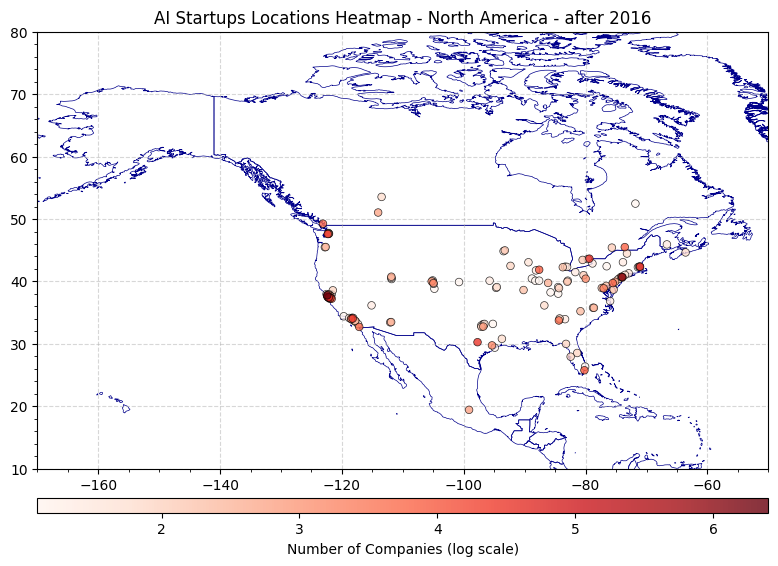

In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

# read the boundaries/world-administrative-boundaries.shp as a GeoDataFrame
world = gpd.read_file('boundaries/world-administrative-boundaries.shp')
world: gpd.GeoDataFrame

city_counts = pd.read_excel('city_counts_after_2016.xlsx')
# take the city_counts with count higher than 1
city_counts = city_counts[city_counts['count'] > 2]
city_counts['count_log'] = np.log(city_counts['count'])
# Assuming city_counts is already defined and has 'Latitude', 'Longitude', and 'count_log' columns
# Create a GeoDataFrame for city_counts
city_counts['geometry'] = gpd.points_from_xy(city_counts['Longitude'], city_counts['Latitude'])
city_counts = gpd.GeoDataFrame(city_counts, geometry='geometry')

# Sort the data by 'count_log' in descending order
city_counts = city_counts.sort_values(by='count_log', ascending=True)

# Plot the world boundaries
fig, ax = plt.subplots(1, 1, figsize=(8, 15))
world.boundary.plot(ax=ax, linewidth=0.5, color='darkblue', zorder=1)

# Define the colormap and normalize the company counts for the gradient
cmap = cm.Reds
norm = mcolors.Normalize(vmin=city_counts['count_log'].min(), vmax=city_counts['count_log'].max())

# Print out the normalization values to debug
print(f"Normalization range: {city_counts['count_log'].min()} to {city_counts['count_log'].max()}")

# Scale marker size based on the number of companies (e.g., scale between 10 and 200)
#size_scale = 100 * (city_counts['count_log'] - city_counts['count_log'].min()) / (city_counts['count_log'].max() - city_counts['count_log'].min()) + 10

# Plot the cities with a gradient based on the number of companies
sc = ax.scatter(
    city_counts['Longitude'], city_counts['Latitude'],
    c=city_counts['count_log'], cmap=cmap, norm=norm,
    s=30,  # Variable size based on company counts
    edgecolor='black', linewidth=0.5, zorder=2, alpha=0.8
)

# Add a colorbar
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.02, aspect=50)
cbar.set_label('Number of Companies (log scale)')

# Turn off the axis
# ax.axis('off')

ax.set_title('AI Startups Locations Heatmap - North America - after 2016')
fig.tight_layout()

# Turn on grid
ax.minorticks_on()
ax.grid(True, linestyle='--', alpha=0.5)

# Set the boundaries for Europe
#ax.set_xlim(-25, 60)
#ax.set_ylim(35, 71)

# Set the boundaries for North America
ax.set_xlim(-170, -50)
ax.set_ylim(10, 80)

# Only ASIA
#ax.set_xlim(26, 169)
#ax.set_ylim(-10, 81)

# Show plot
plt.show()
